<h3 style=" text-align: center;">Logistic regression</h3>
<br>

<p>$Sigmoid function:\sigma(x) = \frac{1}{1+e^{-x}}$</p>
<p>$Continuous\quad prediction\quad function:\quad \widehat { y } =\sigma (S)=\sigma (Wx+b)=\sigma ({ w }_{ 1 }{ x }_{ 1 }+...+{ w }_{ n }{ x }_{ n }+b)\in [0,1]$</p>
<p>$Point\quad error:{ E }_{ i }=-{ y }_{ i }\cdot ln({ \widehat { y }  }_{ i })-(1-{ y }_{ i })\cdot ln(1-{ \widehat { y }  }_{ i })$</p>
<br>
<p>$Total\quad points\quad error:{ E }=-\frac { 1 }{ m } \sum _{ i=1 }^{ m }{ ({ y }_{ i }\cdot ln({ \widehat { y }  }_{ i })+(1-{ y }_{ i })\cdot ln(1-{ \widehat { y }  }_{ i })) } $</p>
<br>
<p>$\sigma '(x)=\frac { d }{ dx } \frac { 1 }{ 1+{ e }^{ -x } } =\frac { d }{ dx } { (1+{ e }^{ -x }) }^{ -1 }=-{ (1+{ e }^{ -x }) }^{ -2 }\cdot ({ -e }^{ -x })=\frac { { e }^{ -x } }{ { (1+{ e }^{ -x }) }^{ 2 } } =\frac { 1 }{ 1+{ e }^{ -x } } \cdot \frac { { e }^{ -x } }{ 1+{ e }^{ -x } } \Rightarrow \\ \sigma '(x)=\sigma (x)(1-\sigma (x))\\ $</p>
<p>$Gradient\quad of\quad E\quad for\quad a\quad point\quad ({ x }_{ 1 }...{ x }_{ n }):\quad \Delta E=(\frac { d }{ d{ w }_{ 1 } } { E },\quad ...\quad ,\frac { d }{ d{ w }_{ n } } { E },\quad \frac { d }{ { d }_{ b } } E)$</p>
<br>
<p>$\frac { d }{ d{ w }_{ j } } \widehat { y } =\quad \frac { d }{ d{ w }_{ j } } \sigma (Wx+b)=\\ =\sigma (Wx+b)(1-\sigma (Wx+b))\cdot \frac { d }{ d{ w }_{ j } } (Wx+b)=\\ =\widehat { y } (1-\widehat { y } )\cdot \frac { d }{ d{ w }_{ j } } (Wx+b)=\\ =\widehat { y } (1-\widehat { y } )\cdot \frac { d }{ d{ w }_{ j } } ({ w }_{ 1 }{ x }_{ 1 }+...+{ w }_{ j }{ x }_{ j }+...+{ w }_{ n }{ x }_{ n }+b)=\\ =\widehat { y } (1-\widehat { y } )\cdot { x }_{ j }$</p>
<br>
<p>$\frac { d }{ d{ w }_{ j } } E=\frac { d }{ d{ w }_{ j } } (-y\cdot ln(\widehat { y } )-(1-y)ln(1-\widehat { y } ))=\\ =-y\frac { d }{ d{ w }_{ j } } ln(\widehat { y } )-(1-y)\frac { d }{ d{ w }_{ j } } ln(1-\widehat { y } )=\\ =-y\cdot \frac { 1 }{ \widehat { y }  } \cdot \frac { d }{ d{ w }_{ j } } \widehat { y } -(1-y)\cdot \frac { 1 }{ 1-\widehat { y }  } \frac { d }{ d{ w }_{ j } } (1-\widehat { y } )=\\ =-y\cdot \frac { 1 }{ \widehat { y }  } \cdot \widehat { y } (1-\widehat { y } )\cdot { x }_{ j }-(1-y)\cdot \frac { 1 }{ 1-\widehat { y }  } \cdot (-1)\widehat { y } (1-\widehat { y } )\cdot { x }_{ j }=\\ =-y\cdot (1-\widehat { y } )\cdot { { x }_{ j } }+(1-y)\cdot { \widehat { y } \cdot x }_{ j }={ x }_{ j }(-y+y\widehat { y } +\widehat { y } -y\widehat { y } )=\\ ={ { x }_{ j } }(\widehat { y } -y)$</p>
<br>
<p>$Similarly:\quad \frac { d }{ { d }b } E=(\widehat { y } -y)$</p>
<p>$For\quad a\quad point\quad with\quad coordinates\quad ({ x }_{ 1 }...{ x }_{ n })\quad  and\quad label\quad y\quad and\quad prediction\quad \widehat { y } ,\\ the\quad gradient\quad of\quad error\quad is:\\ \Delta E=[(\widehat { y } -{ y }){ x }_{ i }\quad ,\quad ...\quad ,\quad (\widehat { y } -{ y }){ x }_{ n }\quad ,\quad (\widehat { y } -{ y })]\\ \Delta E=(\widehat { y } -{ y })({ x }_{ 1 }...{ x }_{ n },1)\\ $</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k',zorder=2)
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k',zorder=2)

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color,zorder=1)

In [2]:
data = pd.read_csv('test.csv', header=None)
#((x,y) points)
X = np.array(data[[0,1]])
#point class: 1 or 0
pointType = np.array(data[2])

- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$


========== Epoch 0 ==========
Train loss:  0.706557203977022
Accuracy:  0.42857142857142855

========== Epoch 50 ==========
Train loss:  0.43913503787718206
Accuracy:  0.7142857142857143

========== Epoch 100 ==========
Train loss:  0.3299057920056553
Accuracy:  1.0

========== Epoch 150 ==========
Train loss:  0.271765184828891
Accuracy:  1.0

========== Epoch 200 ==========
Train loss:  0.23606803417363495
Accuracy:  1.0

========== Epoch 250 ==========
Train loss:  0.21183314727128266
Accuracy:  1.0

========== Epoch 300 ==========
Train loss:  0.1941671310702205
Accuracy:  1.0

========== Epoch 350 ==========
Train loss:  0.18060234153187174
Accuracy:  1.0

========== Epoch 400 ==========
Train loss:  0.16976998530672102
Accuracy:  1.0

========== Epoch 450 ==========
Train loss:  0.16085255308224541
Accuracy:  1.0


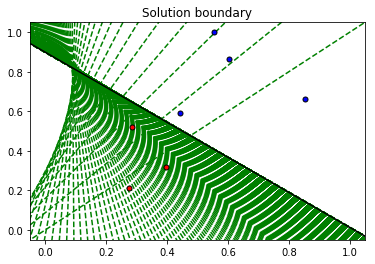

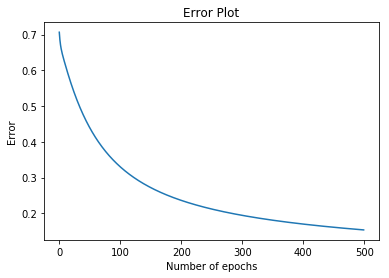

In [3]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#y-hat:continuous prediction function
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

def update_weights(x, y, weights, bias, learnrate):
    #y_hat
    output = output_formula(x, weights, bias)
    #y - y_hat 
    d_error = y - output
    #alfa*(y - y_hat)*x
    weights += learnrate * d_error * x
    bias += learnrate * d_error
    return weights, bias

epochs = 500
learnrate = 0.1
#setting random weights
#n_records, n_features = X.shape
#weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
#print(weights)
weights = [-1,1]
bias = 0
errors = []
last_loss = None

for e in range(epochs):
    display(-weights[0]/weights[1], -bias/weights[1])
    
    for x, y in zip(X, pointType):
        
        #print("x,y ",x,y)
        #output = output_formula(x, weights, bias)
        #print("y-hat",output)
        #error = error_formula(y, output)
        #print("error",error)
        
        weights, bias = update_weights(x, y, weights, bias, learnrate)
        
    #log-loss error on the training set
    out = output_formula(X, weights, bias)
    #print(out)
    loss = np.mean(error_formula(pointType, out))
    errors.append(loss)

    if e % (epochs / 10) == 0:
        print("\n========== Epoch", e,"==========")
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss) 
        last_loss = loss

        #y-hat(output) > 0.5 => point type 1 ; < 0.5 => point type 0
        predictions = out > 0.5

        #print('y-hat=',out)
        #print('points=',pointType)
        #print('predictions=',predictions) 
        #print('verified=',predictions == pointType)

        accuracy = np.mean(predictions == pointType)
        print("Accuracy: ", accuracy)        
        
    

# Plotting the solution boundary (last generated line)
plt.title("Solution boundary")
display(-weights[0]/weights[1], -bias/weights[1], 'black')

# Plotting the data
plot_points(X, pointType)
plt.show()

# Plotting the error
plt.title("Error Plot")
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.plot(errors)
plt.show()

<i>Loss (error) calculation - description</i>

In [4]:
#single point error
output = output_formula(x, weights, bias)
print(output)

0.027684552724872805


In [5]:
#all individual points errors list
out = output_formula(X, weights, bias)
print(out)

[0.708085   0.95798089 0.83387017 0.01496101 0.35334598 0.02509145
 0.02768455]


In [6]:
#loss function: mean of all points errors
loss = np.mean(error_formula(y, out))
print(loss)

0.9572019267021954


Reference

<a href="https://classroom.udacity.com/courses/ud188/lessons/b4ca7aaa-b346-43b1-ae7d-20d27b2eab65/concepts/64f025bd-1d7b-42fb-9f13-8559242c1ec9">Udacity-Gradient descent</a>